# Data Grouping, Concatenation, Joining, and Merging with Pandas

## Grouping Data

In many data analyses, it is necessary to compute summaries not for the entire table but for specific groups of data, typically divided based on the distinct values of a categorical variable.




In [ ]:
import pandas as pd
import numpy as np

In [ ]:
# Creating a sample DataFrame
football = {'Football_team': ['Milan', 'Milan', 'Roma', 'Roma', 'Juve', 'Real_madrid'],
            'Player': ['Inzaghi', 'Gattuso', 'Totti', 'De Rossi', 'Buffon', 'Zidane'],
            'Price': [240, 150, 280, 200, 300, 290]}
football_df = pd.DataFrame(football)
print(football_df)


  Football_team    Player  Price
0         Milan   Inzaghi    240
1         Milan   Gattuso    150
2          Roma     Totti    280
3          Roma  De Rossi    200
4          Juve    Buffon    300
5   Real_madrid    Zidane    290


### Grouping and Aggregating Data
Grouping data and extracting statistics for football players.





In [ ]:
# Grouping by 'Football_team'
by_team = football_df.groupby('Football_team')

In [ ]:
by_team

In [ ]:
# Applying summary methods
print(by_team.Price.count())
print(football_df.groupby('Football_team').Price.count())

Football_team
Juve           1
Milan          2
Real_madrid    1
Roma           2
Name: Price, dtype: int64
Football_team
Juve           1
Milan          2
Real_madrid    1
Roma           2
Name: Price, dtype: int64


In [ ]:
#print(by_team.mean())


In [ ]:
print(by_team.max())
print(by_team.describe())


                Player  Price
Football_team                
Juve            Buffon    300
Milan          Inzaghi    240
Real_madrid     Zidane    290
Roma             Totti    280
              Price                                                     
              count   mean        std    min    25%    50%    75%    max
Football_team                                                           
Juve            1.0  300.0        NaN  300.0  300.0  300.0  300.0  300.0
Milan           2.0  195.0  63.639610  150.0  172.5  195.0  217.5  240.0
Real_madrid     1.0  290.0        NaN  290.0  290.0  290.0  290.0  290.0
Roma            2.0  240.0  56.568542  200.0  220.0  240.0  260.0  280.0


###Using the agg Method
To avoid specifying operations one by one, you can use the agg method after groupby.





In [ ]:
agg1 = by_team.agg({'Price': ['count', 'mean', 'max']})
print(agg1)



              Price            
              count   mean  max
Football_team                  
Juve              1  300.0  300
Milan             2  195.0  240
Real_madrid       1  290.0  290
Roma              2  240.0  280


In [ ]:
# Accessing hierarchical column names
print(agg1['Price']['mean'])
print(type(agg1['Price']['mean']))
print(agg1['Price'][['mean']])
print(type(agg1['Price'][['mean']]))



Football_team
Juve           300.0
Milan          195.0
Real_madrid    290.0
Roma           240.0
Name: mean, dtype: float64
<class 'pandas.core.series.Series'>
                mean
Football_team       
Juve           300.0
Milan          195.0
Real_madrid    290.0
Roma           240.0
<class 'pandas.core.frame.DataFrame'>


### Combining Multiple DataFrames
In this section, we will learn how to combine multiple DataFrames using the concat and join and merge methods.



Creating DataFrames




In [ ]:
# Creating sample DataFrames
df1 = pd.DataFrame({'A': ['Red_0', 'Red_1', 'Red_2', 'Red_3'],
                    'B': ['Blue_0', 'Blue_1', 'Blue_2', 'Blue_3'],
                    'C': ['Green_0', 'Green_1', 'Green_2', 'Green_3'],
                    'D': ['Yellow_0', 'Yellow_1', 'Yellow_2', 'Yellow_3']},
                   index=[0, 1, 2, 3])

df2 = pd.DataFrame({'A': ['Red_4', 'Red_5', 'Red_6', 'Red_7'],
                    'B': ['Blue_4', 'Blue_5', 'Blue_6', 'Blue_7'],
                    'C': ['Green_4', 'Green_5', 'Green_6', 'Green_7'],
                    'D': ['Yellow_4', 'Yellow_5', 'Yellow_6', 'Yellow_7']},
                   index=[4, 5, 6, 7])

df3 = pd.DataFrame({'A': ['Red_8', 'Red_9', 'Red_10', 'Red_11'],
                    'B': ['Blue_8', 'Blue_9', 'Blue_10', 'Blue_11'],
                    'C': ['Green_8', 'Green_9', 'Green_10', 'Green_11'],
                    'D': ['Yellow_8', 'Yellow_9', 'Yellow_10', 'Yellow_11']},
                   index=[8, 9, 10, 11])
print(df1)
print(df2)
print(df3)


       A       B        C         D
0  Red_0  Blue_0  Green_0  Yellow_0
1  Red_1  Blue_1  Green_1  Yellow_1
2  Red_2  Blue_2  Green_2  Yellow_2
3  Red_3  Blue_3  Green_3  Yellow_3
       A       B        C         D
4  Red_4  Blue_4  Green_4  Yellow_4
5  Red_5  Blue_5  Green_5  Yellow_5
6  Red_6  Blue_6  Green_6  Yellow_6
7  Red_7  Blue_7  Green_7  Yellow_7
         A        B         C          D
8    Red_8   Blue_8   Green_8   Yellow_8
9    Red_9   Blue_9   Green_9   Yellow_9
10  Red_10  Blue_10  Green_10  Yellow_10
11  Red_11  Blue_11  Green_11  Yellow_11


### Concatenating DataFrames
Using the concat function to concatenate DataFrames vertically and horizontally.





In [ ]:
# Concatenate vertically (default)
print(pd.concat([df1, df2, df3]))



         A        B         C          D
0    Red_0   Blue_0   Green_0   Yellow_0
1    Red_1   Blue_1   Green_1   Yellow_1
2    Red_2   Blue_2   Green_2   Yellow_2
3    Red_3   Blue_3   Green_3   Yellow_3
4    Red_4   Blue_4   Green_4   Yellow_4
5    Red_5   Blue_5   Green_5   Yellow_5
6    Red_6   Blue_6   Green_6   Yellow_6
7    Red_7   Blue_7   Green_7   Yellow_7
8    Red_8   Blue_8   Green_8   Yellow_8
9    Red_9   Blue_9   Green_9   Yellow_9
10  Red_10  Blue_10  Green_10  Yellow_10
11  Red_11  Blue_11  Green_11  Yellow_11


In [ ]:
# Concatenate horizontally
print(pd.concat([df1, df2, df3], axis=1))



        A       B        C         D      A       B        C         D  \
0   Red_0  Blue_0  Green_0  Yellow_0    NaN     NaN      NaN       NaN   
1   Red_1  Blue_1  Green_1  Yellow_1    NaN     NaN      NaN       NaN   
2   Red_2  Blue_2  Green_2  Yellow_2    NaN     NaN      NaN       NaN   
3   Red_3  Blue_3  Green_3  Yellow_3    NaN     NaN      NaN       NaN   
4     NaN     NaN      NaN       NaN  Red_4  Blue_4  Green_4  Yellow_4   
5     NaN     NaN      NaN       NaN  Red_5  Blue_5  Green_5  Yellow_5   
6     NaN     NaN      NaN       NaN  Red_6  Blue_6  Green_6  Yellow_6   
7     NaN     NaN      NaN       NaN  Red_7  Blue_7  Green_7  Yellow_7   
8     NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN   
9     NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN   
10    NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN   
11    NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN   

         A        B         C        

In [ ]:
# Concatenate horizontally with inner join
print(pd.concat([df1, df2, df3], axis=1, join='inner'))

Empty DataFrame
Columns: [A, B, C, D, A, B, C, D, A, B, C, D]
Index: []


Handling Different Indexes


In [ ]:
# Adjusting indexes and concatenating with inner join
df2.index = [1, 3, 6, 7]
df3.index = [1, 3, 8, 9]
print(pd.concat([df1, df2, df3], axis=1, join='inner'))


       A       B        C         D      A       B        C         D      A  \
1  Red_1  Blue_1  Green_1  Yellow_1  Red_4  Blue_4  Green_4  Yellow_4  Red_8   
3  Red_3  Blue_3  Green_3  Yellow_3  Red_5  Blue_5  Green_5  Yellow_5  Red_9   

        B        C         D  
1  Blue_8  Green_8  Yellow_8  
3  Blue_9  Green_9  Yellow_9  


In [ ]:
print(pd.concat([df1, df2, df3], axis=0, join='inner'))


        A        B         C          D
0   Red_0   Blue_0   Green_0   Yellow_0
1   Red_1   Blue_1   Green_1   Yellow_1
2   Red_2   Blue_2   Green_2   Yellow_2
3   Red_3   Blue_3   Green_3   Yellow_3
1   Red_4   Blue_4   Green_4   Yellow_4
3   Red_5   Blue_5   Green_5   Yellow_5
6   Red_6   Blue_6   Green_6   Yellow_6
7   Red_7   Blue_7   Green_7   Yellow_7
1   Red_8   Blue_8   Green_8   Yellow_8
3   Red_9   Blue_9   Green_9   Yellow_9
8  Red_10  Blue_10  Green_10  Yellow_10
9  Red_11  Blue_11  Green_11  Yellow_11


In [ ]:
print(pd.concat([df1, df2, df3], axis=1, join='outer'))

       A       B        C         D      A       B        C         D       A  \
0  Red_0  Blue_0  Green_0  Yellow_0    NaN     NaN      NaN       NaN     NaN   
1  Red_1  Blue_1  Green_1  Yellow_1  Red_4  Blue_4  Green_4  Yellow_4   Red_8   
2  Red_2  Blue_2  Green_2  Yellow_2    NaN     NaN      NaN       NaN     NaN   
3  Red_3  Blue_3  Green_3  Yellow_3  Red_5  Blue_5  Green_5  Yellow_5   Red_9   
6    NaN     NaN      NaN       NaN  Red_6  Blue_6  Green_6  Yellow_6     NaN   
7    NaN     NaN      NaN       NaN  Red_7  Blue_7  Green_7  Yellow_7     NaN   
8    NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN  Red_10   
9    NaN     NaN      NaN       NaN    NaN     NaN      NaN       NaN  Red_11   

         B         C          D  
0      NaN       NaN        NaN  
1   Blue_8   Green_8   Yellow_8  
2      NaN       NaN        NaN  
3   Blue_9   Green_9   Yellow_9  
6      NaN       NaN        NaN  
7      NaN       NaN        NaN  
8  Blue_10  Green_10  Yellow_10 

### Using the join Method
The join method is used to merge two DataFrames by their indexes. If columns have the same name, rsuffix and lsuffix parameters can be used to manage this.





In [ ]:
# Joining DataFrames
print(df1.join(df2, rsuffix='.1'))


       A       B        C         D    A.1     B.1      C.1       D.1
0  Red_0  Blue_0  Green_0  Yellow_0    NaN     NaN      NaN       NaN
1  Red_1  Blue_1  Green_1  Yellow_1  Red_4  Blue_4  Green_4  Yellow_4
2  Red_2  Blue_2  Green_2  Yellow_2    NaN     NaN      NaN       NaN
3  Red_3  Blue_3  Green_3  Yellow_3  Red_5  Blue_5  Green_5  Yellow_5


In [ ]:
print(df1.join(df2, lsuffix='.0', how='right'))
print(df1.join(df2, rsuffix='.1', how='inner'))
print(df1.join(df2, lsuffix='.0', how='outer'))

## Using the merge Method
The merge method is used for merging DataFrames on a key or multiple keys.



Creating DataFrames for Merging




In [ ]:
left = pd.DataFrame({'stationery': ['pencil', 'glue', 'markers', 'scissors'],
                     'furniture': ['wardrobe', 'table', 'bed', 'desk'],
                     'A': ['A0', 'A1', 'A2', 'A3'],
                     'B': ['B0', 'B1', 'B2', 'B3']})

right = pd.DataFrame({'stationery': ['pencil', 'glue', 'glue', 'markers'],
                      'furniture': ['wardrobe', 'wardrobe', 'wardrobe', 'wardrobe'],
                      'C': ['C0', 'C1', 'C2', 'C3'],
                      'D': ['D0', 'D1', 'D2', 'D3']})
print(left)
print(right)


  stationery furniture   A   B
0     pencil  wardrobe  A0  B0
1       glue     table  A1  B1
2    markers       bed  A2  B2
3   scissors      desk  A3  B3
  stationery furniture   C   D
0     pencil  wardrobe  C0  D0
1       glue  wardrobe  C1  D1
2       glue  wardrobe  C2  D2
3    markers  wardrobe  C3  D3


Merging DataFrames




In [ ]:
# Merging on multiple keys
#print(pd.merge(left, right, on=['furniture']))
print(pd.merge(left, right, on=['furniture', 'stationery']))


  stationery furniture   A   B   C   D
0     pencil  wardrobe  A0  B0  C0  D0


In [ ]:
print(pd.merge(left, right, on=['stationery', 'furniture']))



  stationery furniture   A   B   C   D
0     pencil  wardrobe  A0  B0  C0  D0


In [ ]:
# Different types of joins
print(pd.merge(left, right, on=['furniture', 'stationery'], how='outer'))


  stationery furniture    A    B    C    D
0     pencil  wardrobe   A0   B0   C0   D0
1       glue     table   A1   B1  NaN  NaN
2    markers       bed   A2   B2  NaN  NaN
3   scissors      desk   A3   B3  NaN  NaN
4       glue  wardrobe  NaN  NaN   C1   D1
5       glue  wardrobe  NaN  NaN   C2   D2
6    markers  wardrobe  NaN  NaN   C3   D3


In [ ]:
print(pd.merge(left, right, on=['furniture', 'stationery'], how='left'))


  stationery furniture   A   B    C    D
0     pencil  wardrobe  A0  B0   C0   D0
1       glue     table  A1  B1  NaN  NaN
2    markers       bed  A2  B2  NaN  NaN
3   scissors      desk  A3  B3  NaN  NaN


Matching Elements of Lists/Arrays/Series




In [ ]:
list1 = list(range(10, 18))
list2 = [13, 17, 19]


In [ ]:
[list1.index(x) if x in list1 else None for x in list2]

[3, 7, None]

In [ ]:
print([list1.index(x) if x in list1 else None for x in list2])

In [ ]:
list1 = pd.Series(np.arange(10, 18))
list2 = pd.Series(np.array([13, 17, 19]))
print([list1.index[list1 == x][0] if x in list1.values else None for x in list2])


[3, 7, None]


In [ ]:

print(pd.Index(list1).get_indexer(list2))

[ 3  7 -1]


# Mount Google Drive
To access files stored in your Google Drive, you need to mount it first.


In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Read Data from Google Drive



In [5]:
# Specify the path to your data file in Google Drive
#data_path = '/content/drive/MyDrive/Data Science giacomo scettri/Rome business school/Python e R/drinks.csv'
#data_path_cartel1 = '/content/drive/MyDrive/Data Science giacomo scettri/Rome business school/Python for Data Analytics/Cartel1.csv'
data_path = 'drinks.csv'
data_path_cartel1 = 'Cartel1.csv'

In [6]:
import numpy as np
import pandas as pd
# Read the data
drinks = pd.read_csv(data_path, delimiter = (','))
# Read the data
data_cartel1 = pd.read_csv(data_path_cartel1, delimiter = (';'))

In [7]:
# Display the first few rows of the DataFrame
print("### Data Preview")
print("### Data Head")
print(drinks.head(8))
print(data_cartel1.head(8))

print("### Data Tail")
print(drinks.tail(8))
print(data_cartel1.tail(8))

### Data Preview
### Data Head
             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4             Angola            217               57             45   
5  Antigua & Barbuda            102              128             45   
6          Argentina            193               25            221   
7            Armenia             21              179             11   

   total_litres_of_pure_alcohol      continent  
0                           0.0           Asia  
1                           4.9         Europe  
2                           0.7         Africa  
3                          12.4         Europe  
4                           5.9         Africa  
5                           4.9  No

### Save Processed Data to Google Drive


In [9]:
# Save the processed DataFrame back to Google Drive.
processed_data_path = 'drinks2.csv'
drinks.to_csv(processed_data_path, index=False)

print(f"Processed data saved to {processed_data_path}")

Processed data saved to drinks2.csv


### Share Results
To share the processed data with collaborators, go to Google Drive, locate `processed_data.csv`,and use Google Drive's sharing options to share the file.

# Exploratory Data Analysis `drinks.csv`



### 1: Import & Exploration

- How many records does it contain?
- How many features does it contain?
- What are the names of the columns?
- What type of data does each column contain?
- Display the first 10 rows.

In [10]:
# Import the dataset
drinks = drinks

# Number of records
print(f'The dataset contains {drinks.shape[0]} records')

# Number of features
print(f'Each record contains {drinks.shape[1]} features')

# Column names
print(list(drinks.columns))

# Data types of each column
print(drinks.dtypes)

# First 10 rows
print(drinks.head(10))


The dataset contains 193 records
Each record contains 6 features
['country', 'beer_servings', 'spirit_servings', 'wine_servings', 'total_litres_of_pure_alcohol', 'continent']
country                          object
beer_servings                     int64
spirit_servings                   int64
wine_servings                     int64
total_litres_of_pure_alcohol    float64
continent                        object
dtype: object
             country  beer_servings  spirit_servings  wine_servings  \
0        Afghanistan              0                0              0   
1            Albania             89              132             54   
2            Algeria             25                0             14   
3            Andorra            245              138            312   
4             Angola            217               57             45   
5  Antigua & Barbuda            102              128             45   
6          Argentina            193               25            221   
7  

###2: Cleaning
- Rename the columns with shorter names.
- Display the dataset without the total_litres_of_pure_alcohol column.
- Permanently remove the total_litres_of_pure_alcohol column.
- Change the order of columns so that continent comes first, followed by country, and then the rest.





In [21]:
# Import the dataset
drinks = pd.read_csv(data_path, delimiter = (','))
print(drinks.head() )
# Rename columns
drinks.rename(columns={'beer_servings': 'Beer', #birra
                       'spirit_servings': 'Spirit', #liquori
                       'wine_servings': 'Wine'}, inplace=True) #vino, #country=paese #continent=continente

# Rename columns
#drinks.rename(columns={'beer_servings': 'Birra', #birra
#                       'spirit_servings': 'Liquori', #liquori
#                       'wine_servings': 'Vino',
#                       'country':'paese',
#                       'continent':'continente'}, inplace=True) #vino, #country=paese #continent=continente

#drinks.rename(columns={'Birra': 'beer_servings', #birra
#                       'Liquori': 'spirit_servings', #liquori
#                       'Vino': 'wine_servings',
#                       'paese': 'country',
#                       'continente': 'continent'}, inplace=True) #vino, #country=paese #continent=continente


# Display without 'total_litres_of_pure_alcohol'
print(drinks.drop(columns='total_litres_of_pure_alcohol').head(10))

# Permanently remove 'total_litres_of_pure_alcohol'
#drinks.drop(columns='total_litres_of_pure_alcohol', inplace=True)

# Change column order
#drinks = drinks[['continent', 'country', 'Beer', 'Spirit', 'Wine']] #birra, vino, liquori, paese, continente
#drinks = drinks[['Birra', 'Vino', 'Liquori', 'paese', 'continente']] #
print(drinks.head())

       country  beer_servings  spirit_servings  wine_servings  \
0  Afghanistan              0                0              0   
1      Albania             89              132             54   
2      Algeria             25                0             14   
3      Andorra            245              138            312   
4       Angola            217               57             45   

   total_litres_of_pure_alcohol continent  
0                           0.0      Asia  
1                           4.9    Europe  
2                           0.7    Africa  
3                          12.4    Europe  
4                           5.9    Africa  
             country  Beer  Spirit  Wine      continent
0        Afghanistan     0       0     0           Asia
1            Albania    89     132    54         Europe
2            Algeria    25       0    14         Africa
3            Andorra   245     138   312         Europe
4             Angola   217      57    45         Africa
5  Antigu

### Exercise 3: Exploration (2)
- How many unique values does the continent column have?
- Are there any duplicate records?
- Are there any missing values (NA)?





In [22]:
drinks.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
188    False
189    False
190    False
191    False
192    False
Length: 193, dtype: bool

In [23]:
# Unique values in 'continent'
print(list(drinks.continent.unique()))

# Number of duplicate records
print(f'Number of duplicate records: {drinks.duplicated().sum()}')

# Check for missing values
print(drinks.isna().sum())

# Display records with NA values
print(drinks[drinks.isna().any(axis=1)])


['Asia', 'Europe', 'Africa', 'North America', 'South America', 'Oceania']
Number of duplicate records: 0
country                         0
Beer                            0
Spirit                          0
Wine                            0
total_litres_of_pure_alcohol    0
continent                       0
dtype: int64
Empty DataFrame
Columns: [country, Beer, Spirit, Wine, total_litres_of_pure_alcohol, continent]
Index: []


###4: New Column
- Create a new column with the number of pints of beer consumed (1 pint = 0.56826125 liters).
- Display the first 10 rows.
- Remove the newly created column to return to the original DataFrame.





In [24]:
# Create new column for pints of beer
drinks['Beer (Pint)'] = round(drinks['Beer'] / 0.56826125)
print(drinks.head(10))

# Remove the new column
drinks.drop(columns='Beer (Pint)', inplace=True)


             country  Beer  Spirit  Wine  total_litres_of_pure_alcohol  \
0        Afghanistan     0       0     0                           0.0   
1            Albania    89     132    54                           4.9   
2            Algeria    25       0    14                           0.7   
3            Andorra   245     138   312                          12.4   
4             Angola   217      57    45                           5.9   
5  Antigua & Barbuda   102     128    45                           4.9   
6          Argentina   193      25   221                           8.3   
7            Armenia    21     179    11                           3.8   
8          Australia   261      72   212                          10.4   
9            Austria   279      75   191                           9.7   

       continent  Beer (Pint)  
0           Asia          0.0  
1         Europe        157.0  
2         Africa         44.0  
3         Europe        431.0  
4         Africa        3

###5: Filtering Data
- Select countries that consume more than 300 liters of wine per capita per year.
- Select countries that consume between 30 and 60 liters of spirits per capita per year (inclusive).
- Select countries that consume more than 300 liters per capita per year of any category of alcohol.





In [25]:
# Countries consuming more than 300 liters of wine
print(drinks[drinks.Wine > 300])

# Countries consuming between 30 and 60 liters of spirits
condition = (drinks.Spirit >= 30) & (drinks.Spirit <= 60)
print(drinks[condition])

# Countries consuming more than 300 liters of any alcohol category
condition_wine = drinks.Wine > 300
condition_beer = drinks.Beer > 300
condition_spirit = drinks.Spirit > 300
print(drinks[condition_wine | condition_beer | condition_spirit])

#remove duplicated
condition_duplicated = drinks.duplicated()
print(drinks[~condition_duplicated])

      country  Beer  Spirit  Wine  total_litres_of_pure_alcohol continent
3     Andorra   245     138   312                          12.4    Europe
61     France   127     151   370                          11.8    Europe
136  Portugal   194      67   339                          11.0    Europe
                 country  Beer  Spirit  Wine  total_litres_of_pure_alcohol  \
4                 Angola   217      57    45                           5.9   
10            Azerbaijan    21      46     5                           1.3   
20               Bolivia   167      41     8                           3.8   
22              Botswana   173      35    35                           5.4   
29            Cabo Verde   144      56    16                           4.0   
49              Djibouti    15      44     3                           1.1   
59                  Fiji    77      35     1                           2.0   
71         Guinea-Bissau    28      31    21                           2.5   
83

###6: Exploration (3)
- Calculate the minimum, maximum, and average beer consumption across the dataset.





In [26]:
# Minimum beer consumption
print(f'Minimum beer consumption: {drinks.Beer.min()}')

# Maximum beer consumption
print(f'Maximum beer consumption: {drinks.Beer.max()}')

# Average beer consumption
print(f'Average beer consumption: {drinks.Beer.mean()}')


Minimum beer consumption: 0
Maximum beer consumption: 376
Average beer consumption: 106.16062176165804


###7: Grouping Data
- Calculate the average beer consumption among African countries.
- Calculate the average and maximum beer consumption for each continent.





In [27]:
# Average beer consumption in Africa
in_africa = drinks.continent == 'Africa'
africa_drinks = drinks[in_africa]
print(f'Average beer consumption in Africa: {africa_drinks.Beer.mean()}')

def somma(elements):
  return elements.sum()

# Average and maximum beer consumption by continent
print(drinks.groupby('continent')['Beer'].agg(['mean', 'max', somma]))


Average beer consumption in Africa: 61.471698113207545
                     mean  max  somma
continent                            
Africa          61.471698  376   3258
Asia            37.045455  247   1630
Europe         193.777778  361   8720
North America  145.434783  285   3345
Oceania         89.687500  306   1435
South America  175.083333  333   2101


###8: Grouping Data (2)
- Find the country that consumes the most beer.
- Find the country that consumes the most beer in Europe.
- Find the country that consumes the most beer in Asia.
- Are there any records where all numerical features are 0? If so, which ones?



In [ ]:
# Country with the highest beer consumption
print(drinks.loc[drinks.Beer.idxmax()])

# Country with the highest beer consumption in Europe
in_europe = drinks.continent == 'Europe'
europe_drinks = drinks[in_europe]
print(europe_drinks.loc[europe_drinks.Beer.idxmax()])

# Country with the highest beer consumption in Asia
in_asia = drinks.continent == 'Asia'
asia_drinks = drinks[in_asia]
print(asia_drinks.loc[asia_drinks.Beer.idxmax()])

# Records with all numerical features as 0
print(drinks[(drinks[['Beer', 'Spirit', 'Wine']] == 0).all(axis=1)])


###9: Visualize Data (1)
- Add a column Rand Flat with random values uniformly distributed between 0 and 1.
- Add a column Rand Norm with random values normally distributed with mean 45 and standard deviation 5.
- Use the .hist() method to visualize the distributions of Rand Flat and Rand Norm, then delete them.





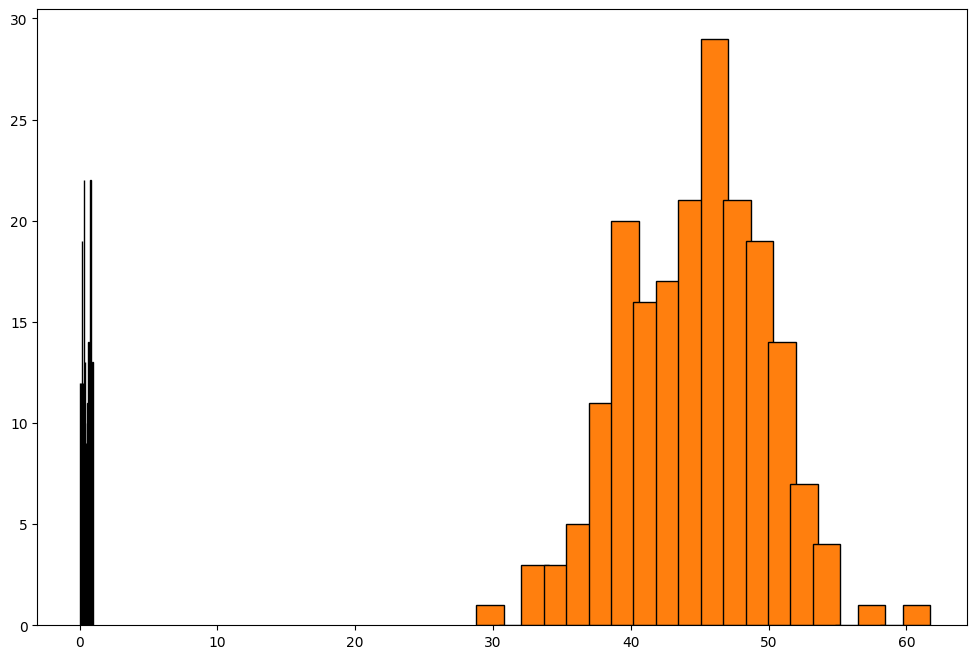

In [28]:
import numpy as np

# Add 'Rand Flat' column
drinks['Rand Flat'] = np.random.rand(len(drinks.index))
drinks['Rand Flat'].hist(edgecolor='black', bins=np.linspace(0, 1, 15), width=0.06, figsize=(12, 8), grid=False)

# Add 'Rand Norm' column
sigma = 5
mu = 45
drinks['Rand Norm'] = sigma * np.random.randn(len(drinks.index)) + mu
drinks['Rand Norm'].hist(edgecolor='black', bins=20, width=2, figsize=(12, 8), grid=False)

# Remove the columns
drinks.drop(columns=['Rand Norm', 'Rand Flat'], inplace=True)


###10: Visualize Data (2)
- Create a bar plot showing the number of countries per continent.
- Create a bar plot with the total alcohol consumption per continent divided by type of beverage.





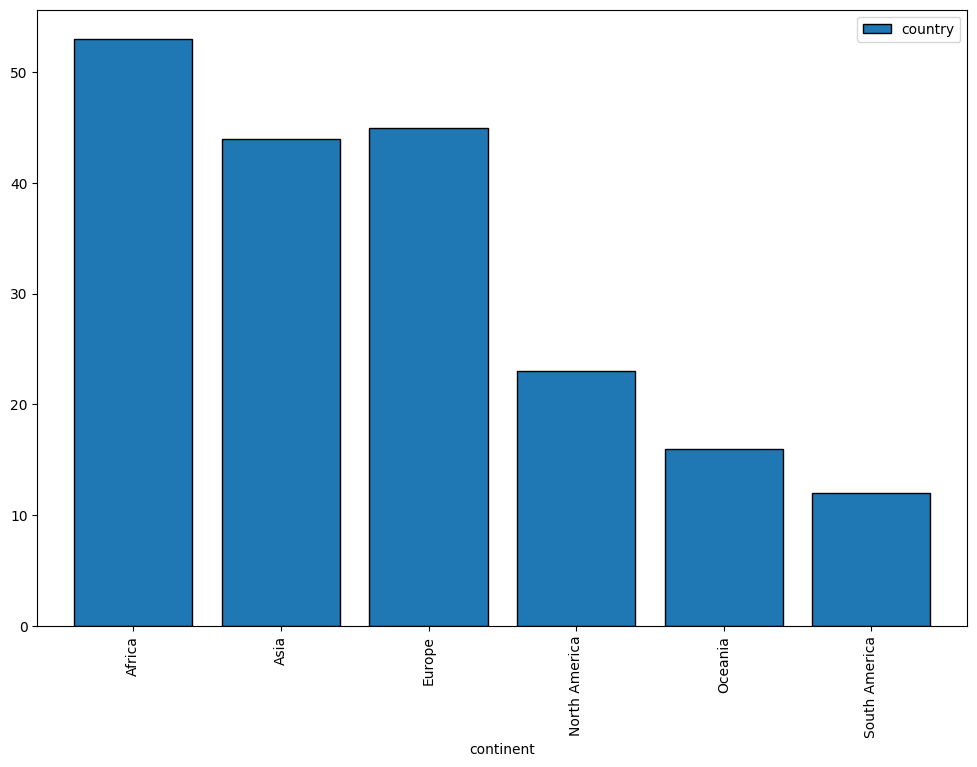

TypeError: Axes.bar() missing 2 required positional arguments: 'x' and 'height'

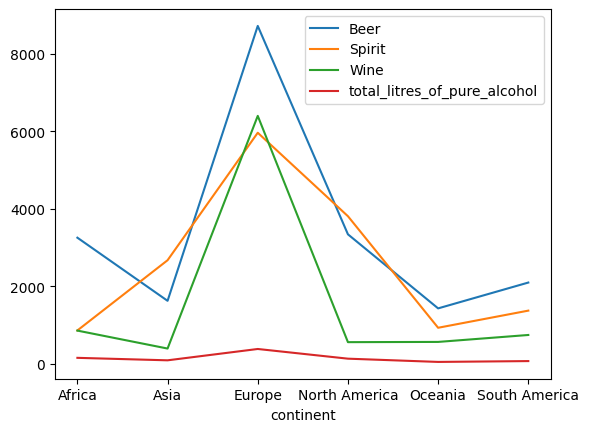

In [29]:
import matplotlib.pyplot as plt

# Bar plot: number of countries per continent
drinks[['country', 'continent']].groupby('continent').count().plot.bar(edgecolor='black', width=0.8, figsize=(12, 8))
plt.show()

# Bar plot: total alcohol consumption per continent by beverage type
drinks.groupby('continent').sum().plot().bar(stacked=True, edgecolor='black', width=0.8, figsize=(12, 8))
plt.show()


### 11: Regularize Data
- Save the records for North America in a new DataFrame using the .copy() method.
- Create a new column in this DataFrame containing the sum of Beer, Wine, and Spirit.
- Plot a histogram of this new column with 10 bins between 0 and 900.
- Write a function to normalize a column to have a mean of 0 and variance of 1.
- Apply this function to the new column and plot a histogram of the normalized data with 10 bins between -2.5 and 3.

In [30]:
# Save North American records
drinks_north_america = drinks[drinks['continent'] == 'North America'].copy()

# Create 'total' column
drinks_north_america['total'] = drinks_north_america['Beer'] + drinks_north_america['Wine'] + drinks_north_america['Spirit']
print(drinks_north_america['total'])

# Histogram of 'total' column
drinks_north_america['total'].hist(bins=range(0, 900, 90), edgecolor='black', grid=False, color='#86bf91', rwidth=0.9, figsize=(12, 8))

# Normalization function
def regularize(col):
    return (col - col.mean()) / col.std()

# Apply normalization and plot histogram
regularize(drinks_north_america['total']).hist(bins=np.linspace(-2.5, 3.5,

_IncompleteInputError: incomplete input (1669736152.py, line 16)